In [271]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px  
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

In [272]:
df= pd.read_csv('mcp1.csv')
df.shape

(5000, 19)

In [273]:
df.describe(include='all')

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment
count,4741,4746,4733,4739,4.500000e+03,4.501000e+03,4.496000e+03,4514.000000,4502.000000,4506.000000,4504.000000,4.491000e+03,4505.000000,4521.000000,4741,4743,4508.000000,4510.000000,4738
unique,4741,6,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,366,366,NaN,NaN,3
top,CAM0001,Billboard,Electronics,Kuala Lumpur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/9/2023,7/7/2023,NaN,NaN,High
freq,1,990,978,988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,23,NaN,NaN,1601
mean,NaN,NaN,NaN,NaN,3.196766e+05,2.754637e+05,6.050865e+05,27467.000985,0.585820,5591.891502,0.556345,5.962208e+05,2.816823,200.590123,NaN,NaN,3.491172,6.418550,NaN
std,NaN,NaN,NaN,NaN,7.511176e+05,3.985757e+05,1.643209e+06,23203.538244,0.800421,5629.011928,0.580404,7.834836e+05,2.769284,173.398322,NaN,NaN,4.180570,7.773072,NaN
min,NaN,NaN,NaN,NaN,1.001400e+04,1.000000e+00,1.593000e+03,104.000000,0.000500,13.000000,0.000300,0.000000e+00,0.000000,1.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,1.379872e+05,1.113680e+05,2.624278e+05,12713.750000,0.250425,2604.250000,0.261425,2.574585e+05,1.270000,94.000000,NaN,NaN,2.000000,3.000000,NaN
50%,NaN,NaN,NaN,NaN,2.659450e+05,2.292810e+05,5.089675e+05,26232.000000,0.500150,5076.500000,0.507450,5.093340e+05,2.610000,188.000000,NaN,NaN,3.000000,6.000000,NaN
75%,NaN,NaN,NaN,NaN,3.855895e+05,3.445920e+05,7.663295e+05,38618.250000,0.760400,7578.000000,0.755375,7.717310e+05,3.830000,278.000000,NaN,NaN,4.000000,8.000000,NaN


In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Campaign_ID             4741 non-null   object 
 1   Channel                 4746 non-null   object 
 2   Product_Category        4733 non-null   object 
 3   Region                  4739 non-null   object 
 4   Budget                  4500 non-null   float64
 5   Spend                   4501 non-null   float64
 6   Impressions             4496 non-null   float64
 7   Clicks                  4514 non-null   float64
 8   CTR                     4502 non-null   float64
 9   Conversions             4506 non-null   float64
 10  CR                      4504 non-null   float64
 11  Revenue                 4491 non-null   float64
 12  ROI                     4505 non-null   float64
 13  Duration                4521 non-null   float64
 14  Start_Date              4741 non-null   

In [275]:
df.head(5)

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment
0,CAM0001,Billboard,Fashion,Kuala Lumpur,484341.0,197038.0,545901.0,NaN,0.0785,7993.0,0.3414,849005.0,0.64,212.0,2/3/2023,23/12/2023,3.0,3.0,Medium
1,CAM0002,NaN,Health,Sarawak,468792.0,33743.0,527513.0,4130.0,0.9479,9459.0,NaN,921078.0,3.78,29.0,NaN,NaN,3.0,7.0,Medium
2,CAM0003,Radio,Electronics,Penang,10487.0,6745.0,806911.0,12209.0,NaN,7168.0,0.0517,51142.0,3.64,74.0,12/4/2023,20/10/2023,1.0,2.0,Medium
3,CAM0004,Email,Electronics,Penang,345431.0,329112.0,108570.0,34391.0,0.6157,7190.0,0.3579,191887.0,2.64,67.0,24/4/2023,26/1/2023,5.0,6.0,High
4,CAM0005,Radio,Fashion,Kuala Lumpur,322345.0,34365.0,799855.0,13056.0,NaN,1794.0,0.0544,167241.0,1.02,40.0,10/1/2023,1/1/2023,5.0,6.0,Low


In [276]:
df.isnull().sum()

Campaign_ID               259
Channel                   254
Product_Category          267
Region                    261
Budget                    500
Spend                     499
Impressions               504
Clicks                    486
CTR                       498
Conversions               494
CR                        496
Revenue                   509
ROI                       495
Duration                  479
Start_Date                259
End_Date                  257
Customer_Satisfaction     492
Campaign_Effectiveness    490
Market_Segment            262
dtype: int64

In [277]:
# sustituimos los valores nulos de la columna campaña por la progresion de los valores anteriores
df['num'] = df['Campaign_ID'].str.extract(r'(\d+)').astype(float)
df['num'] = df['num'].interpolate(method='linear')
df['Campaign_ID'] = 'CAM' + df['num'].round(0).astype(int).astype(str)
df.drop(columns=['num'], inplace=True)

In [278]:
df.dropna(thresh=df.shape[1] - 3,inplace=True)
df

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment
0,CAM1,Billboard,Fashion,Kuala Lumpur,484341.0,197038.0,545901.0,NaN,0.0785,7993.0,0.3414,849005.0,0.640000,212.0,2/3/2023,23/12/2023,3.0,3.0,Medium
2,CAM3,Radio,Electronics,Penang,10487.0,6745.0,806911.0,12209.0,NaN,7168.0,0.0517,51142.0,3.640000,74.0,12/4/2023,20/10/2023,1.0,2.0,Medium
3,CAM4,Email,Electronics,Penang,345431.0,329112.0,108570.0,34391.0,0.6157,7190.0,0.3579,191887.0,2.640000,67.0,24/4/2023,26/1/2023,5.0,6.0,High
4,CAM5,Radio,Fashion,Kuala Lumpur,322345.0,34365.0,799855.0,13056.0,NaN,1794.0,0.0544,167241.0,1.020000,40.0,10/1/2023,1/1/2023,5.0,6.0,Low
5,CAM6,TV,Electronics,Penang,422726.0,NaN,25680.0,16342.0,0.7683,9786.0,0.3395,480187.0,1.810000,174.0,16/8/2023,15/6/2023,5.0,3.0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,CAM4995,TV,NaN,Kuala Lumpur,330357.0,233849.0,96761.0,43407.0,0.5625,6183.0,0.9312,76243.0,2.550000,322.0,7/10/2023,24/6/2023,1.0,4.0,Low
4995,CAM4996,Email,Automotive,Kuala Lumpur,373204.0,239182.0,947505.0,27359.0,0.4446,2725.0,0.1643,739721.0,17.287862,170.0,4/4/2023,15/12/2023,4.0,5.0,Low
4996,CAM4997,Radio,Electronics,Kuala Lumpur,81357.0,381641.0,270685.0,2575.0,0.8224,1555.0,0.2425,324435.0,1.500000,148.0,28/1/2023,26/12/2023,2.0,7.0,Low
4998,CAM4999,Social Media,Electronics,Kuala Lumpur,120531.0,433558.0,857140.0,7037.0,0.2863,3374.0,0.9039,373110.0,0.390000,76.0,2/11/2023,23/8/2023,2.0,1.0,Medium


In [279]:
df.drop('Start_Date', axis=1, inplace=True)
df.drop('End_Date', axis=1, inplace=True)

<Axes: >

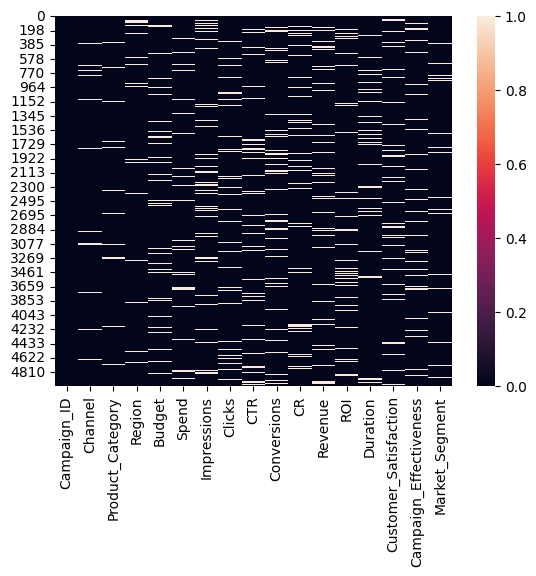

In [280]:
sns.heatmap(df.isnull())

In [281]:
df.loc[df['Customer_Satisfaction']>5,'Customer_Satisfaction']=np.nan
df.loc[df['Campaign_Effectiveness']>10,'Campaign_Effectiveness']=np.nan

In [282]:
from sklearn.impute import KNNImputer
df
knn = KNNImputer(n_neighbors=5)
neighbors = (knn.fit_transform(df[['Budget','Spend','Impressions','Clicks','CTR','Conversions','CR','Revenue','ROI','Duration','Customer_Satisfaction','Campaign_Effectiveness']]))


In [293]:
categorics=df[['Channel','Product_Category','Region','Market_Segment']]

numerics=pd.DataFrame(neighbors,columns=['Budget','Spend','Impressions','Clicks','CTR','Conversions','CR','Revenue','ROI','Duration','Customer_Satisfaction','Campaign_Effectiveness']).round(2)

numerics

,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Customer_Satisfaction,Campaign_Effectiveness
0,484341.0,197038.00,545901.0,25853.6,0.08,7993.0,0.34,849005.0,0.64,212.0,3.0,3.0
1,10487.0,6745.00,806911.0,12209.0,0.52,7168.0,0.05,51142.0,3.64,74.0,1.0,2.0
2,345431.0,329112.00,108570.0,34391.0,0.62,7190.0,0.36,191887.0,2.64,67.0,5.0,6.0
3,322345.0,34365.00,799855.0,13056.0,0.39,1794.0,0.05,167241.0,1.02,40.0,5.0,6.0
4,422726.0,940912.75,25680.0,16342.0,0.77,9786.0,0.34,480187.0,1.81,174.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4724,330357.0,233849.00,96761.0,43407.0,0.56,6183.0,0.93,76243.0,2.55,322.0,1.0,4.0
4725,373204.0,239182.00,947505.0,27359.0,0.44,2725.0,0.16,739721.0,17.29,170.0,4.0,5.0
4726,81357.0,381641.00,270685.0,2575.0,0.82,1555.0,0.24,324435.0,1.50,148.0,2.0,7.0
4727,120531.0,433558.00,857140.0,7037.0,0.29,3374.0,0.90,373110.0,0.39,76.0,2.0,1.0


In [294]:
numerics.shape

(4729, 12)

In [295]:
categorics.fillna(method='ffill',inplace=True)



C:\Users\Usuario\AppData\Local\Temp\ipykernel_284\2454625449.py:1: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_284\2454625449.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [304]:
categoricos=categorics[['Channel','Product_Category','Region','Market_Segment']]
categoricos['Campaign_ID']=df['Campaign_ID']
categoricos[['Campaign_ID','Channel','Product_Category','Region','Market_Segment']]
categoricos.reset_index(drop=True,inplace=True)


In [312]:
df2=pd.DataFrame(columns=df.columns)
for j in categoricos.columns:
    df2[j]=categoricos[j]


for i in numerics.columns:
    df2[i]=numerics[i]



<Axes: >

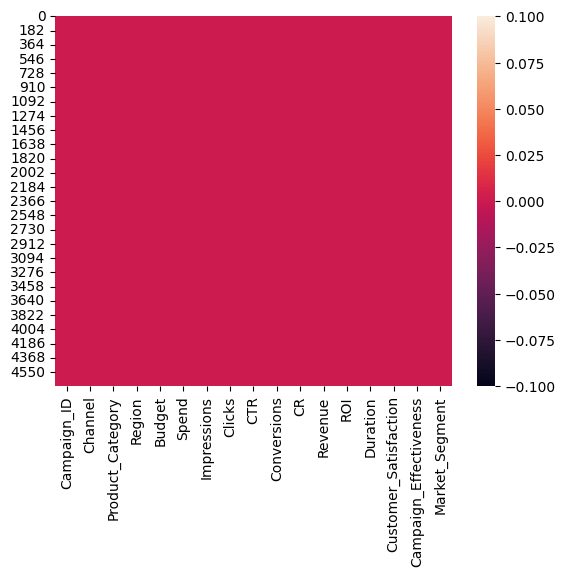

In [316]:
sns.heatmap(df2.isnull())

In [317]:
numericos=(df2.select_dtypes(include='float'))
textos=(df2.select_dtypes(include='object').columns)


In [318]:
df2.head()

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment
0,CAM1,Billboard,Fashion,Kuala Lumpur,484341.0,197038.00,545901.0,25853.6,0.08,7993.0,0.34,849005.0,0.64,212.0,3.0,3.0,Medium
1,CAM3,Radio,Electronics,Penang,10487.0,6745.00,806911.0,12209.0,0.52,7168.0,0.05,51142.0,3.64,74.0,1.0,2.0,Medium
2,CAM4,Email,Electronics,Penang,345431.0,329112.00,108570.0,34391.0,0.62,7190.0,0.36,191887.0,2.64,67.0,5.0,6.0,High
3,CAM5,Radio,Fashion,Kuala Lumpur,322345.0,34365.00,799855.0,13056.0,0.39,1794.0,0.05,167241.0,1.02,40.0,5.0,6.0,Low
4,CAM6,TV,Electronics,Penang,422726.0,940912.75,25680.0,16342.0,0.77,9786.0,0.34,480187.0,1.81,174.0,5.0,3.0,Medium


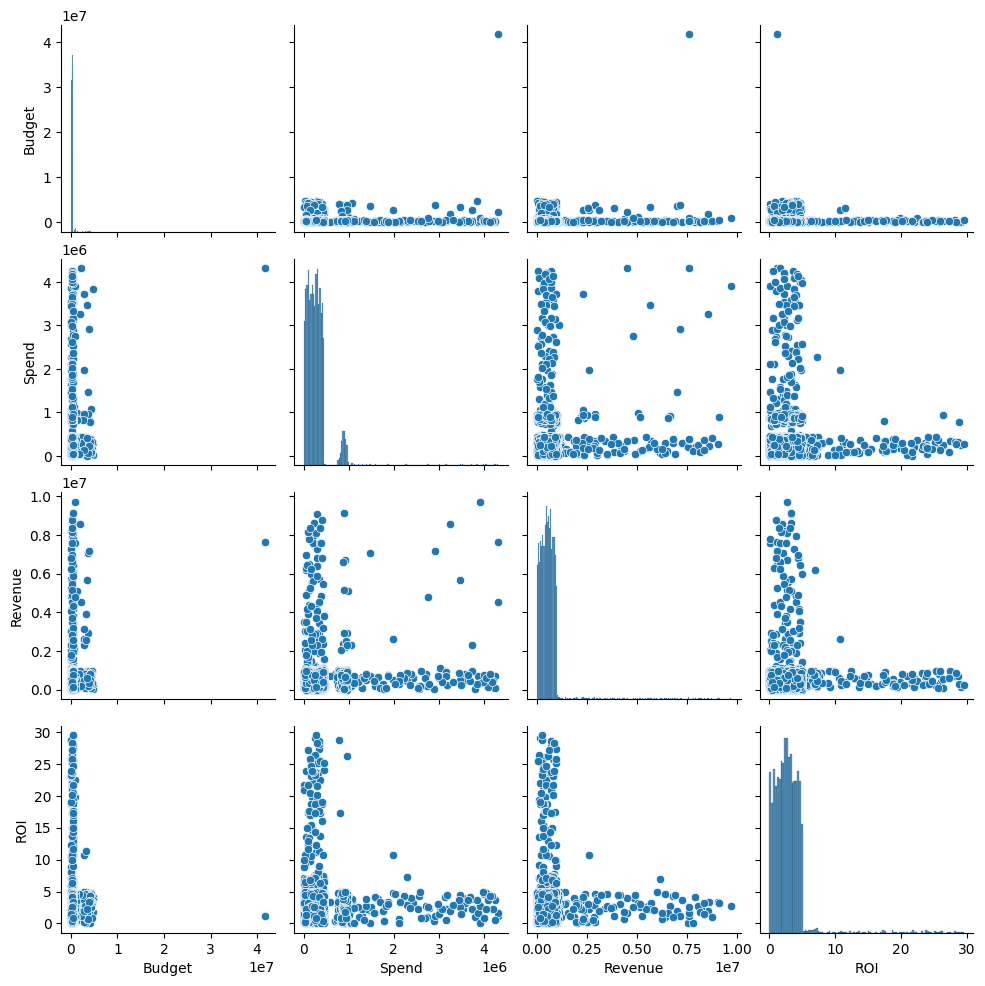

In [319]:
sns.pairplot(df2[['Budget','Spend','Revenue','ROI']])

<Axes: >

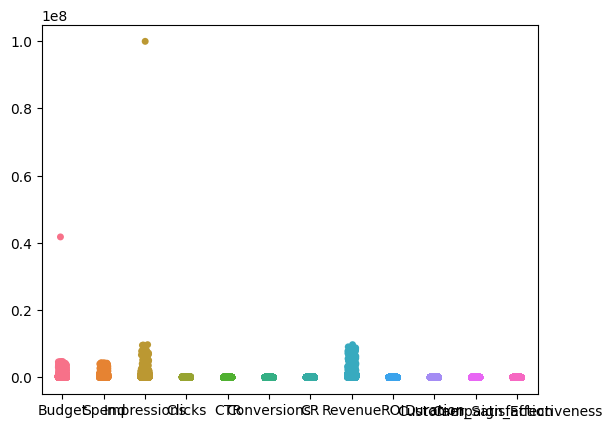

In [320]:
sns.stripplot(data=numericos)

<Axes: >

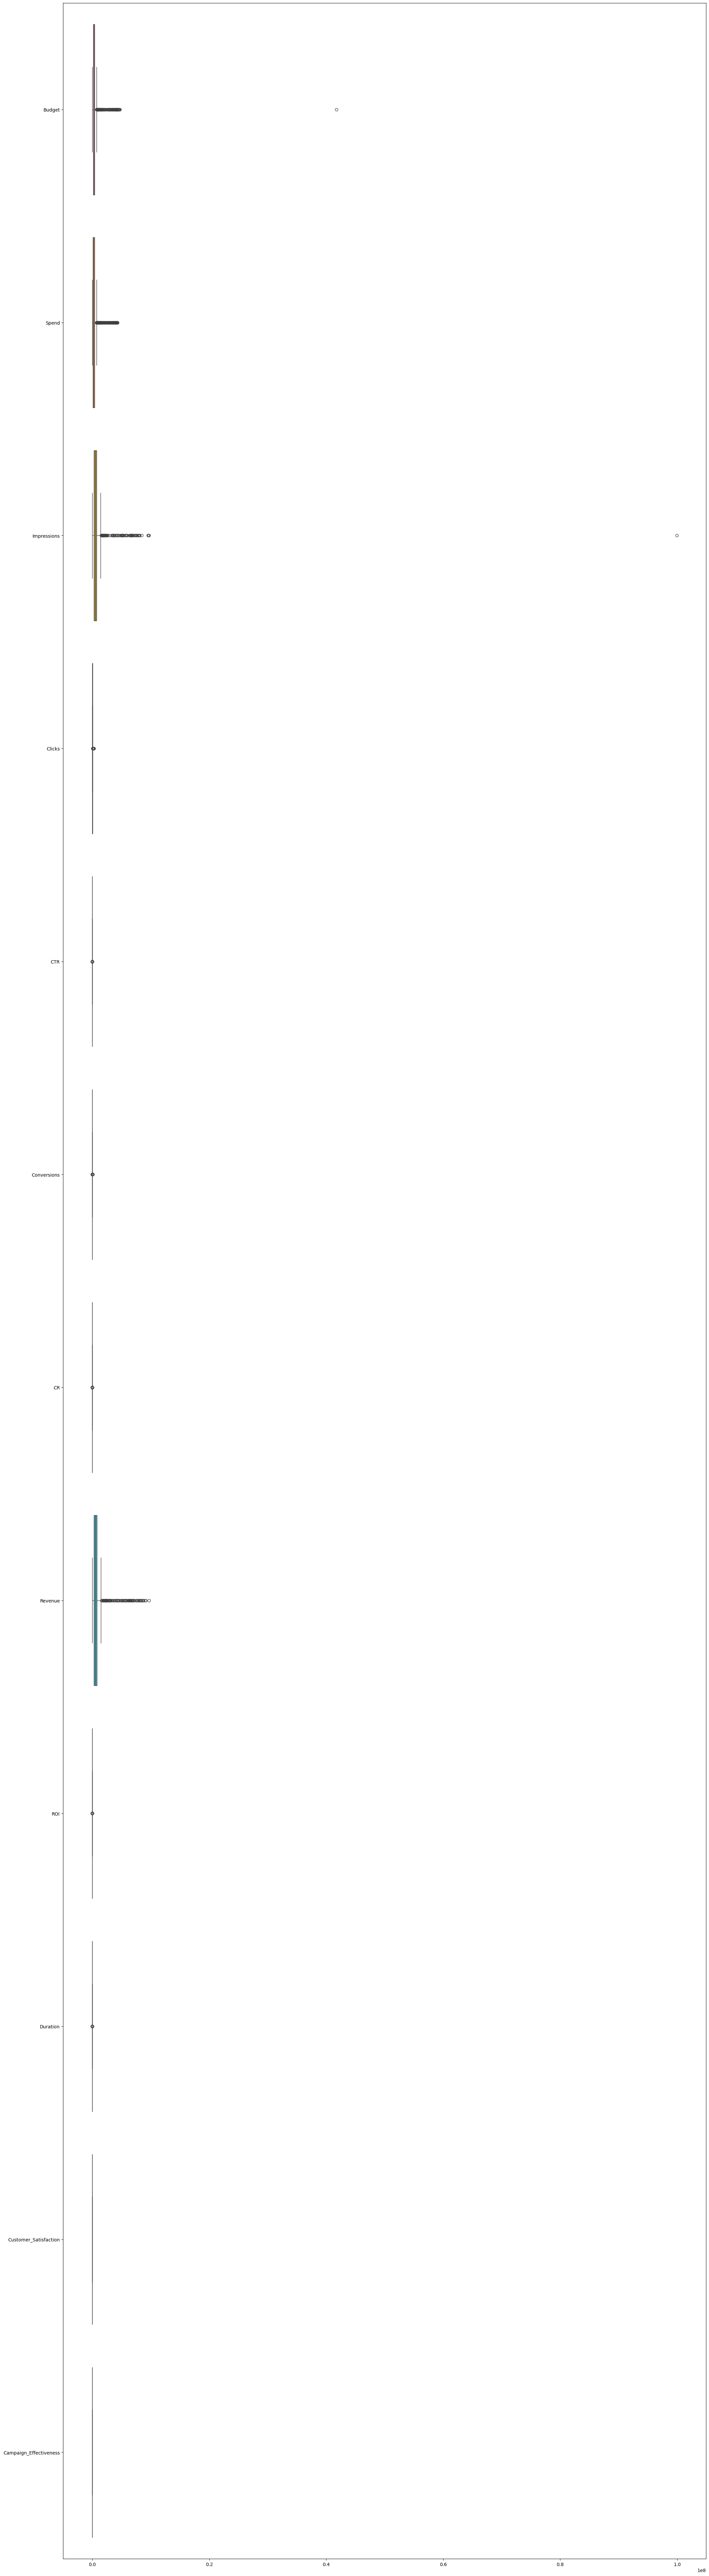

In [321]:
plt.figure(figsize=(25,100))
sns.boxplot(data=numericos,orient='h')

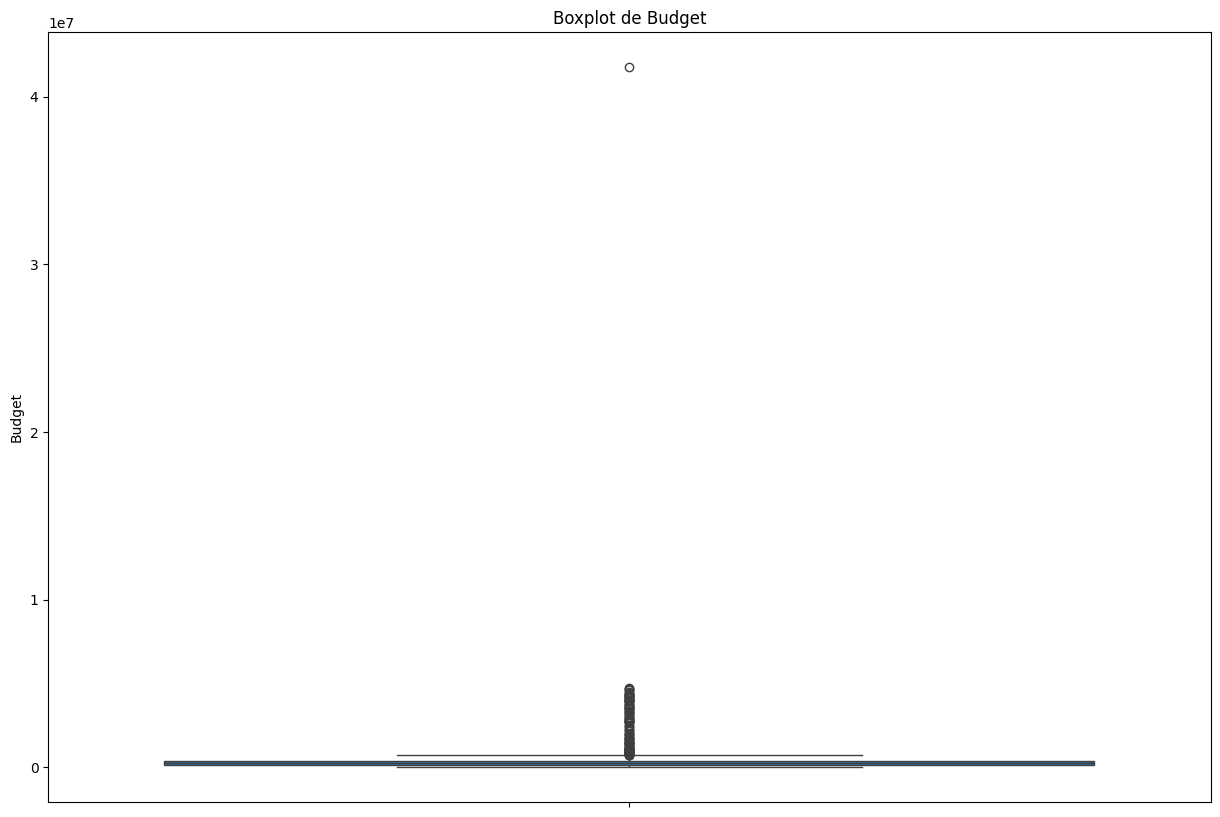

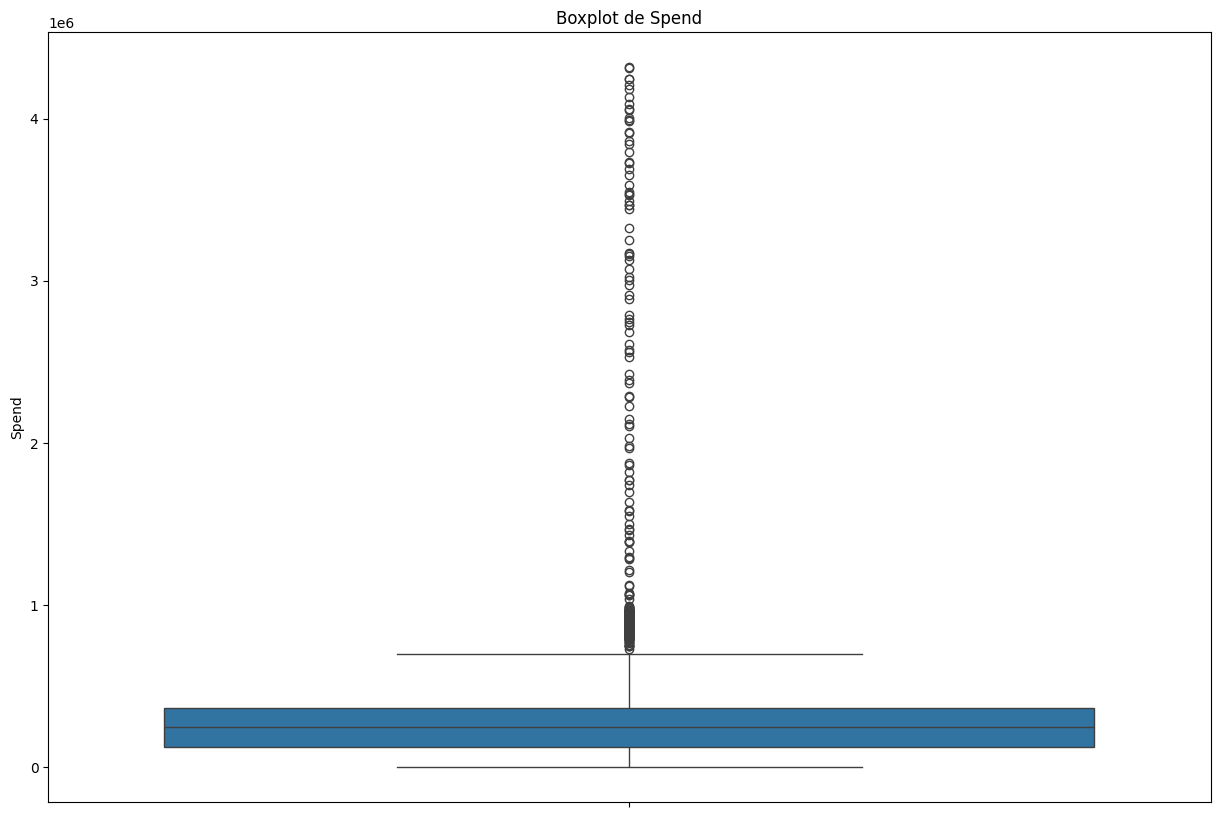

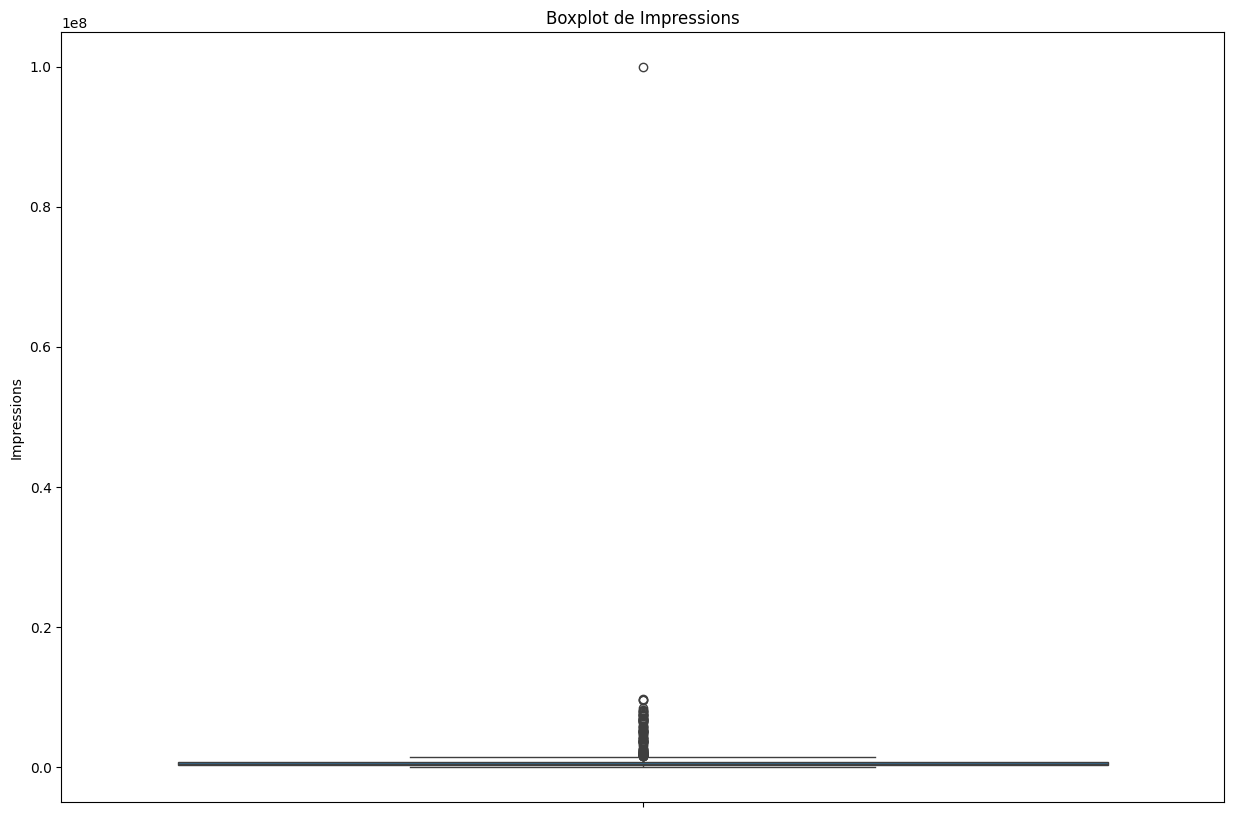

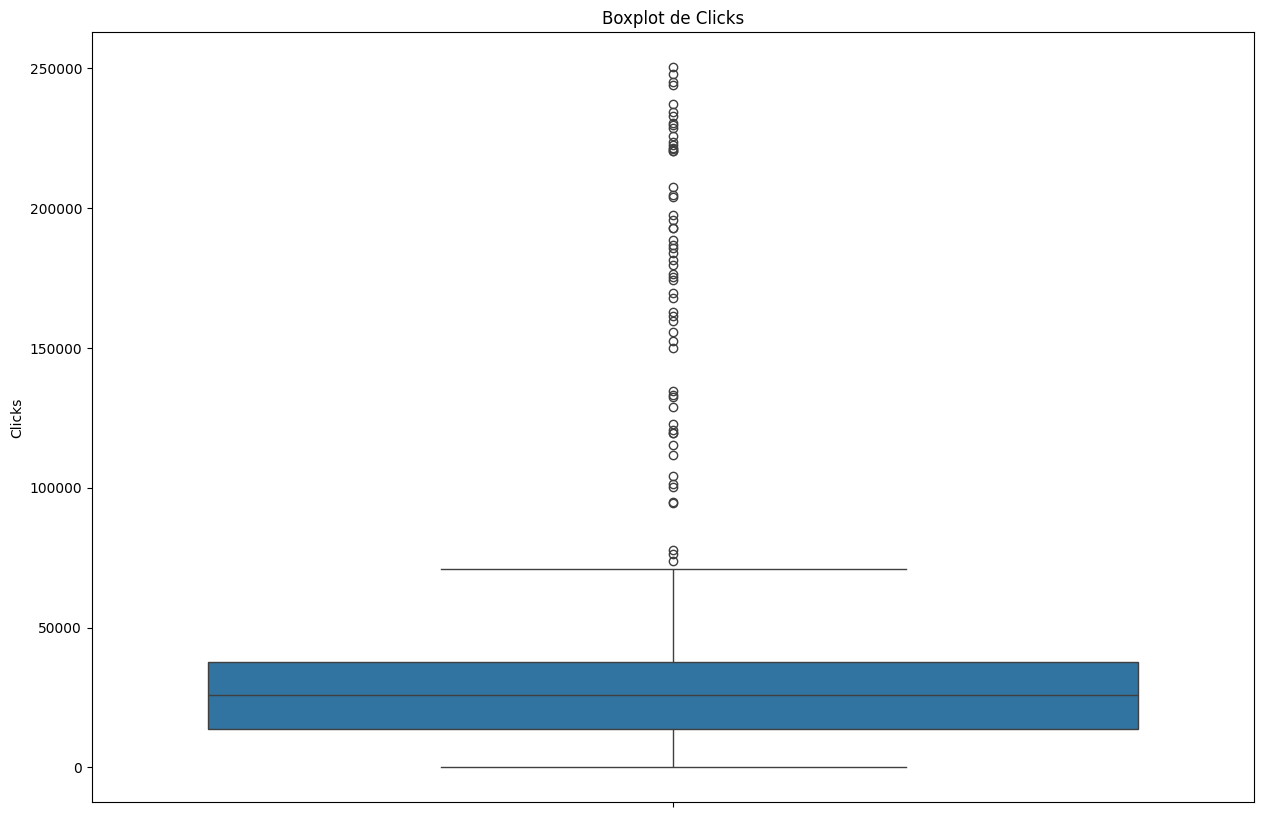

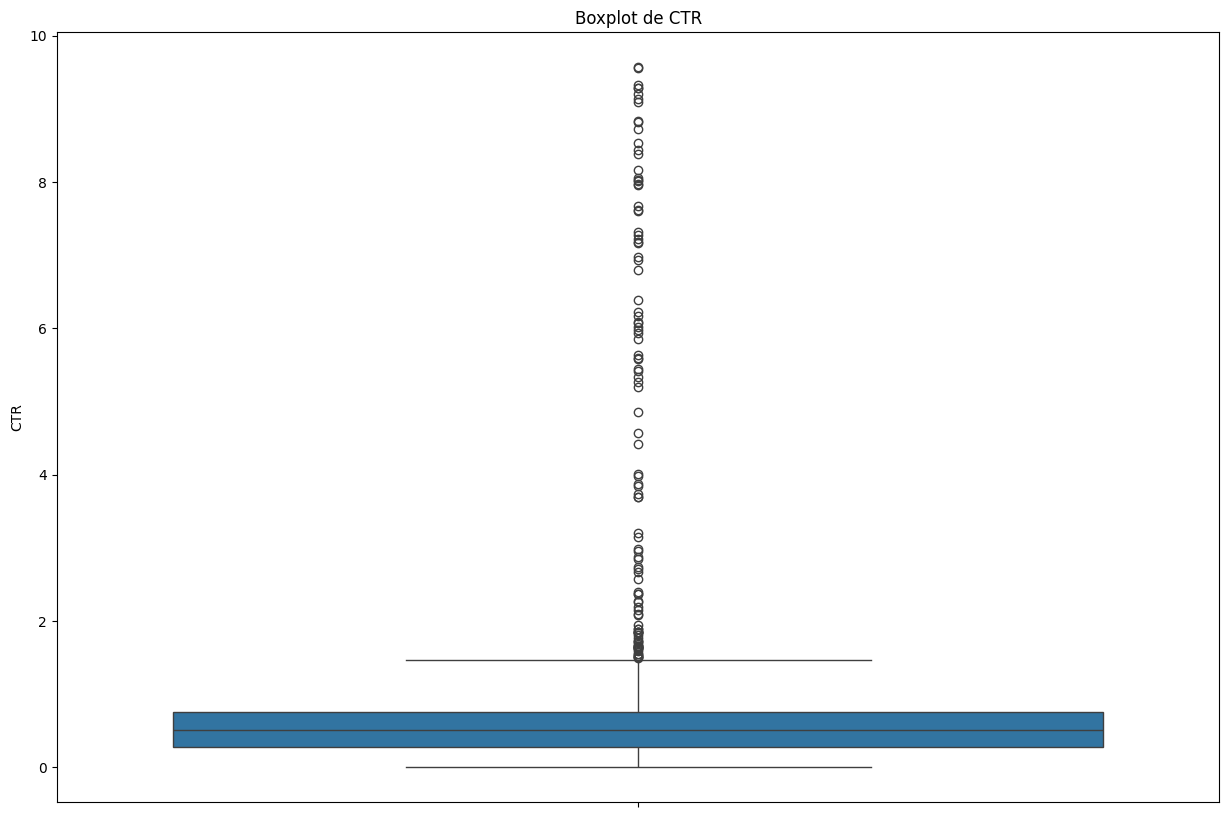

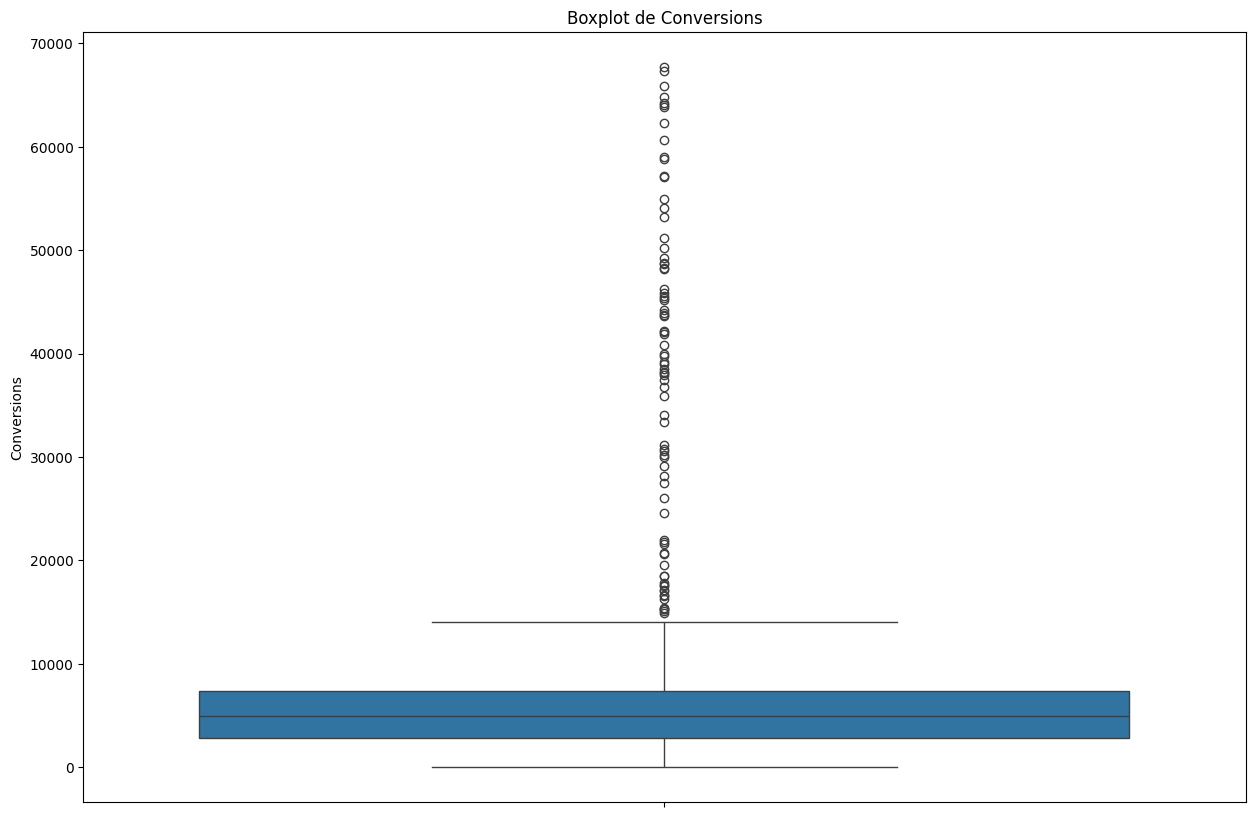

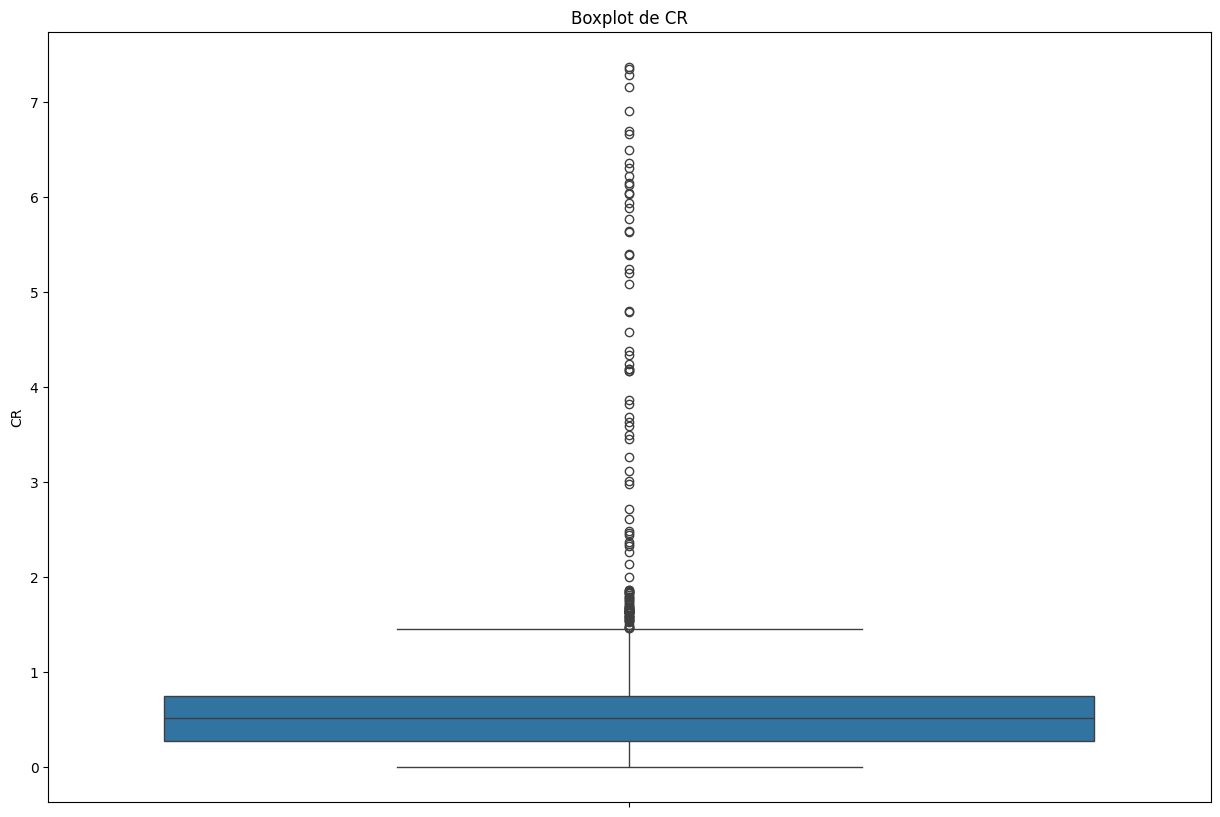

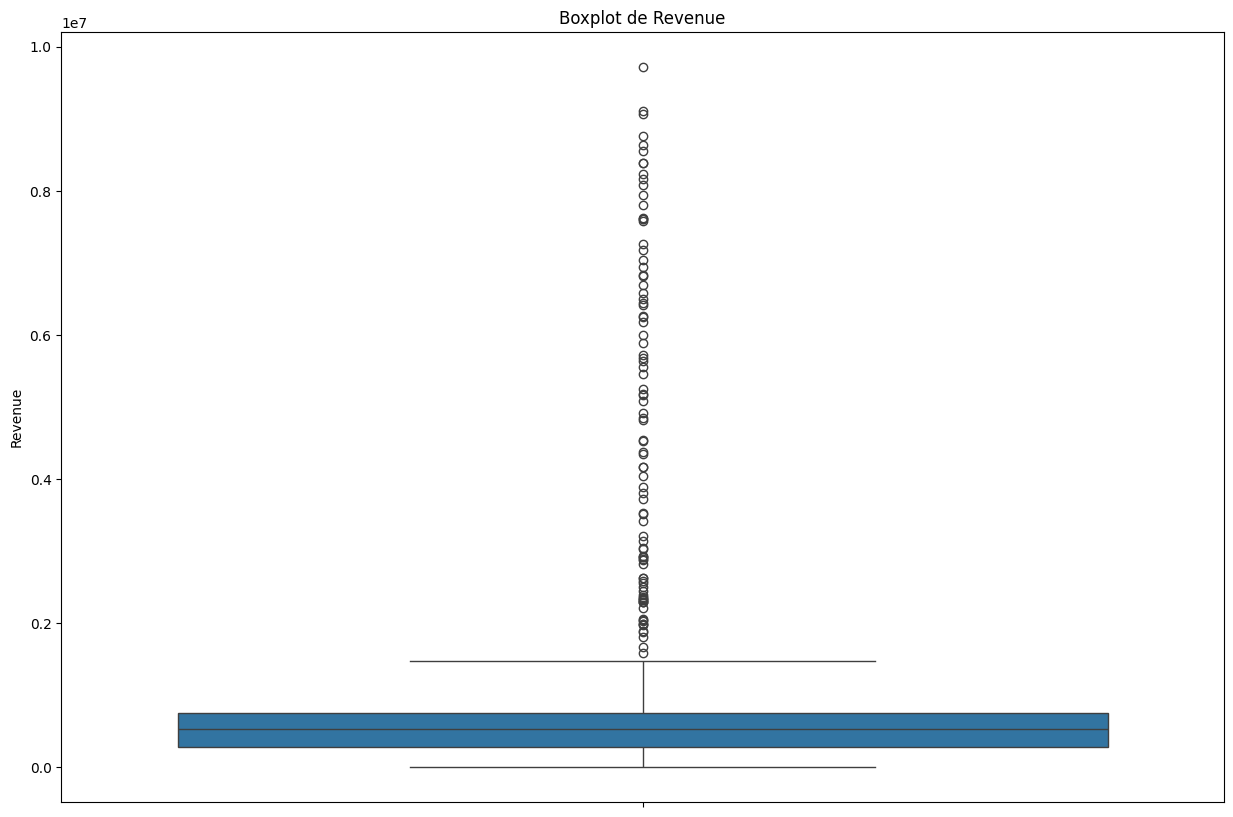

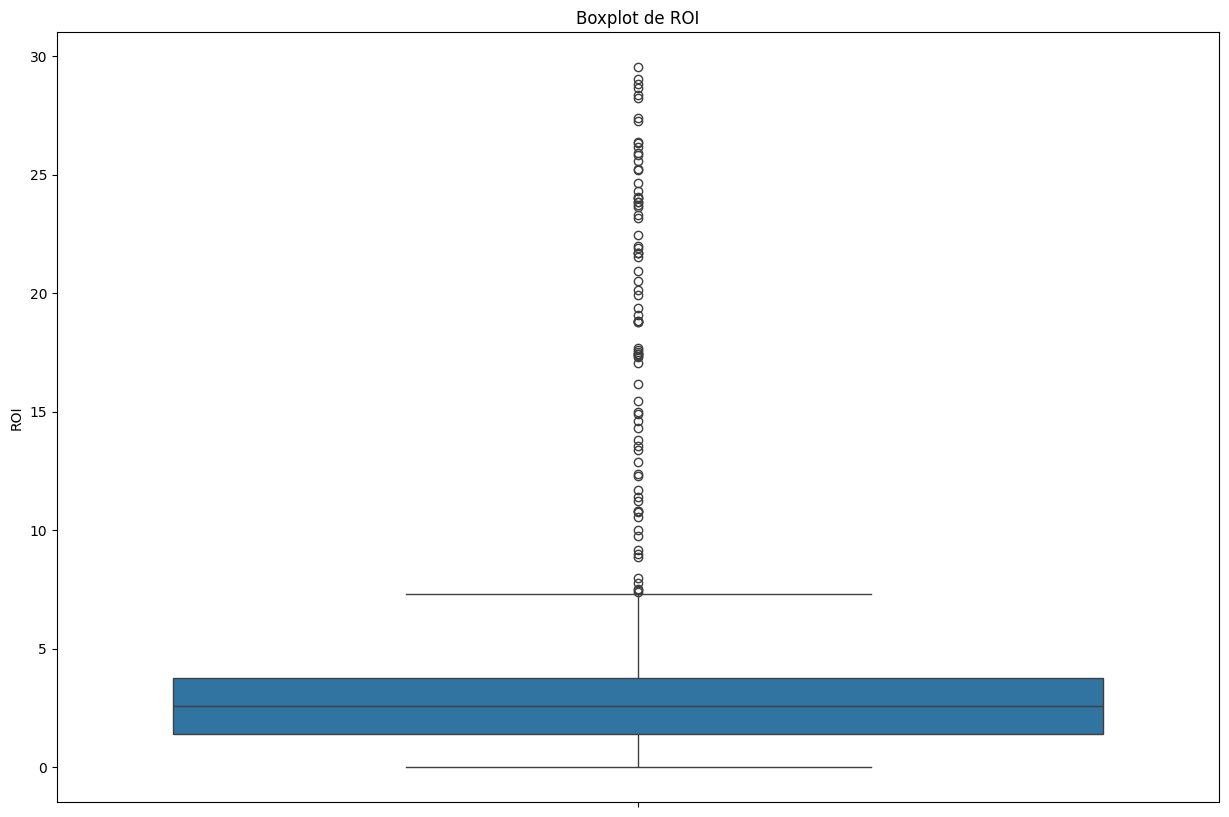

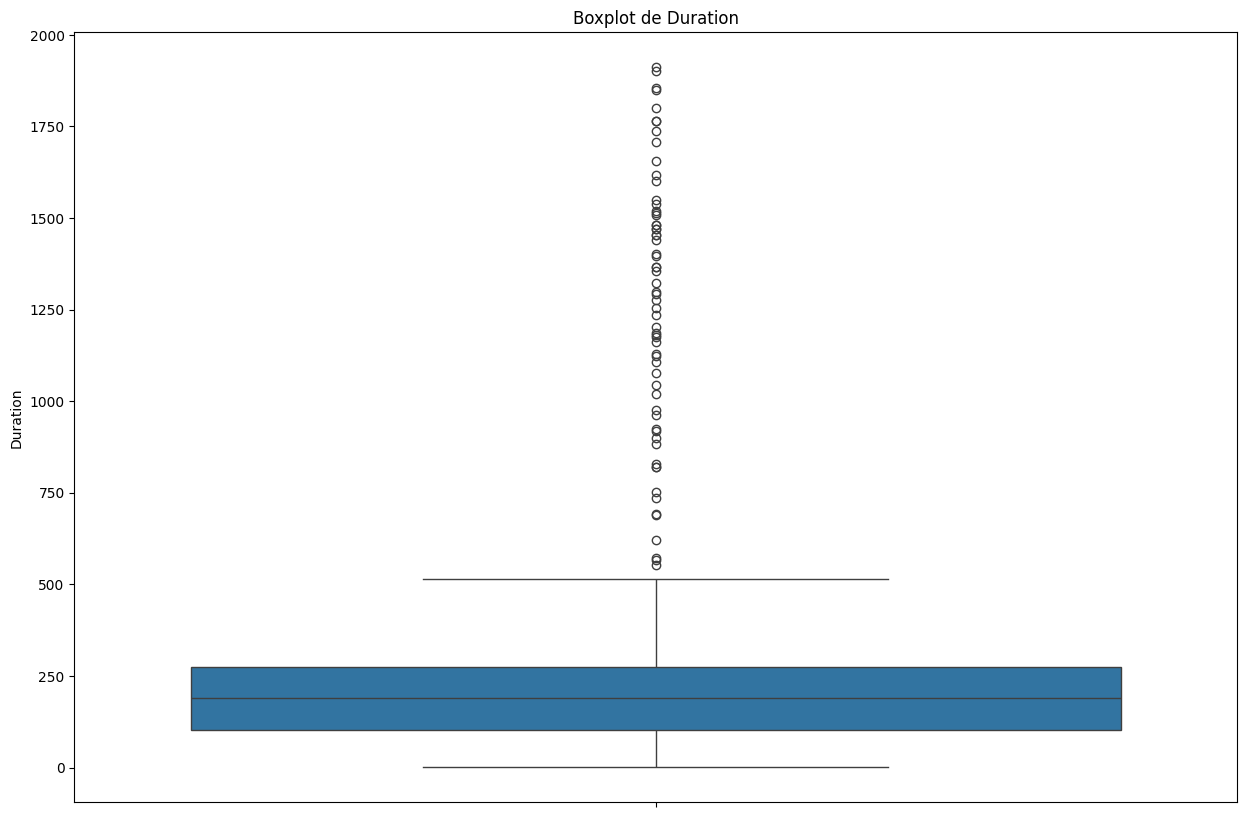

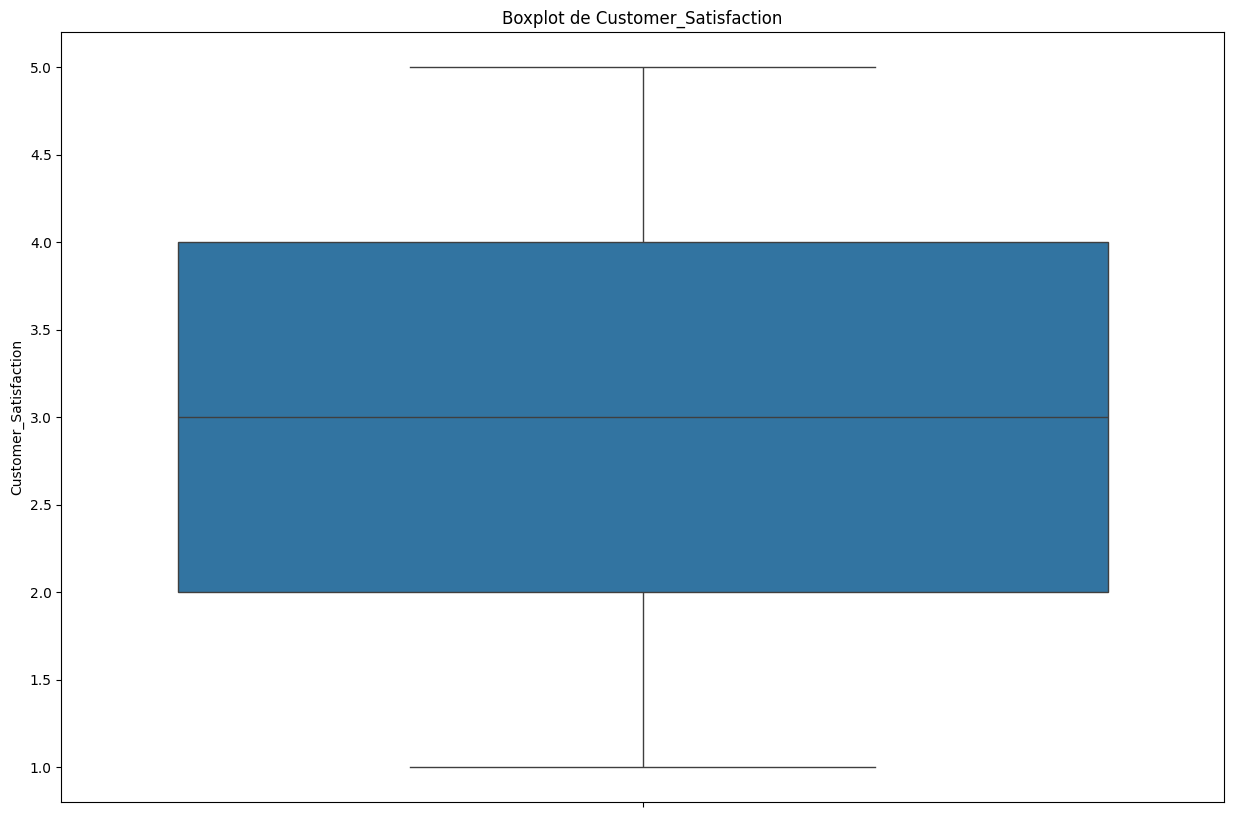

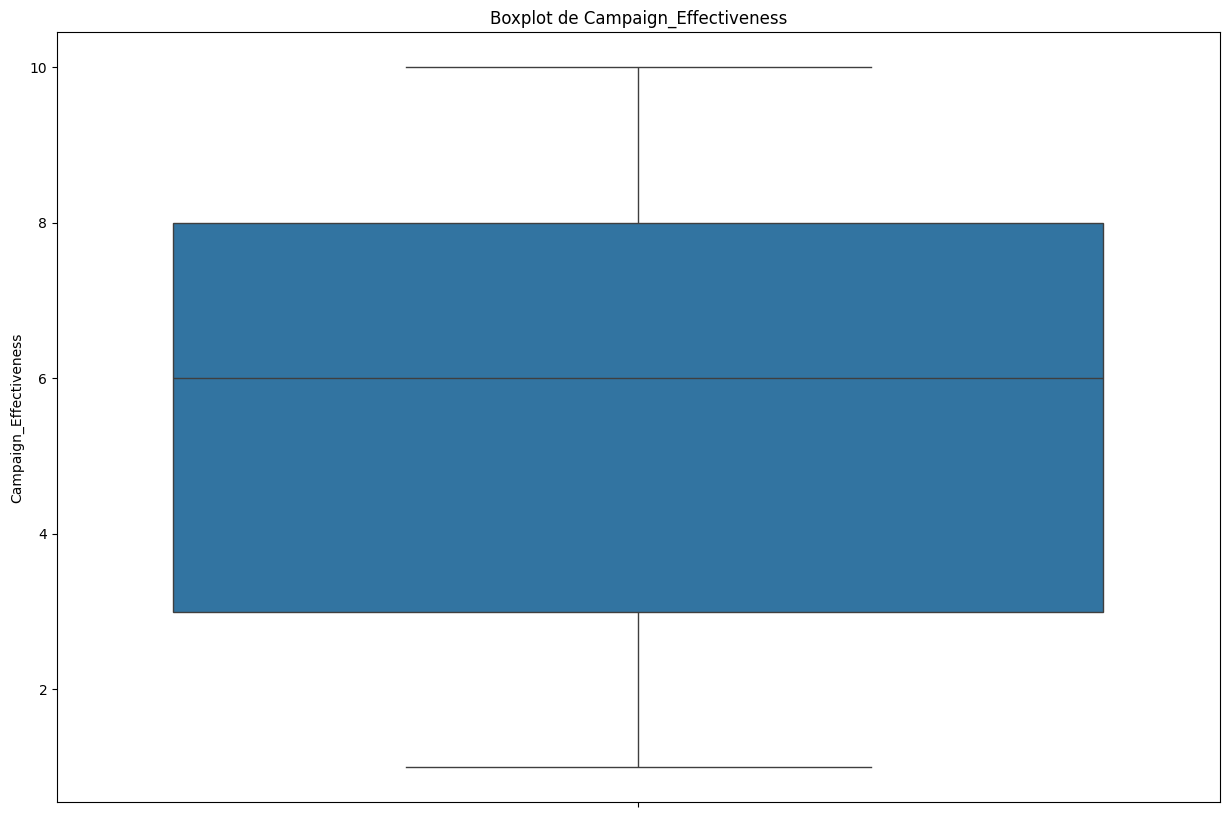

In [322]:
for i in numericos.columns:
    plt.figure(figsize=(15, 10))
    sns.boxplot(y=numericos[i])
    plt.title(f'Boxplot de {i}')
    plt.show()
#sns.boxplot(data=numericos)


In [325]:
df2['Impressions'].max()

99916600.0

In [ ]:
df2[['Campaign_Effectiveness']].isnull().sum()

Campaign_Effectiveness    414
dtype: int64

In [47]:
for i in numericos.columns:
    fig=px.scatter(df2,y=i)
    fig.show()

<Axes: >

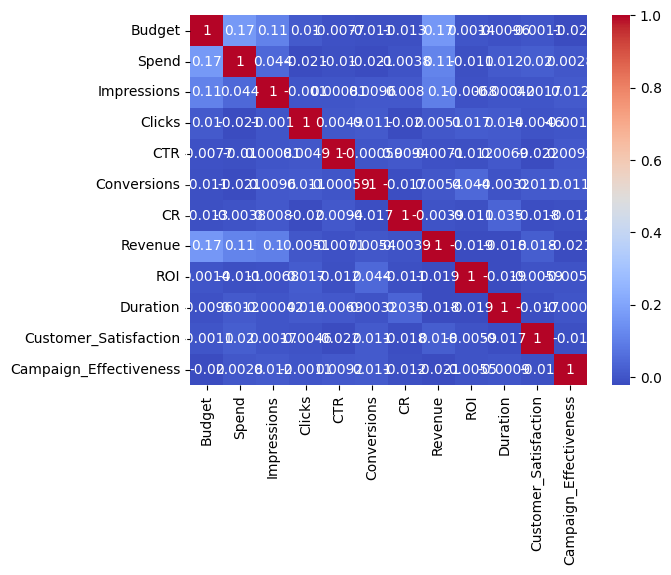

In [328]:
sns.heatmap(numericos.corr(), annot=True, cmap='coolwarm')

In [38]:
px.scatter(df2,y='Budget',width=1200,height=350)


In [27]:
df2.iloc[317]

Campaign_ID                     CAM339
Channel                           News
Product_Category               Fashion
Region                    Kuala Lumpur
Market_Segment                    High
Budget                      41756100.0
Spend                        4309670.0
Impressions                  6590660.0
Clicks                         29435.0
CTR                             0.6558
Conversions                     1063.0
CR                               0.457
Revenue                      7616400.0
ROI                               1.18
Duration                          60.0
Customer_Satisfaction              3.0
Campaign_Effectiveness             1.0
Name: 317, dtype: object

In [18]:
#plt.subplots(nrows=4,ncols=3,figsize=(20,25))

for i, column in enumerate(df2.columns, 1):
    plt.subplot(1, len(df2.columns), i)  # Crear subplots en la misma fila
    sns.boxplot(y=df2[column])  # Boxplot solo para la columna actual
    plt.title(f'Boxplot de {column}')  # Título de cada gráfico

# Ajustar el layout para que no se sobrepongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()

KeyboardInterrupt: 

: 

: 

IndexError: index 15 is out of bounds for axis 0 with size 15

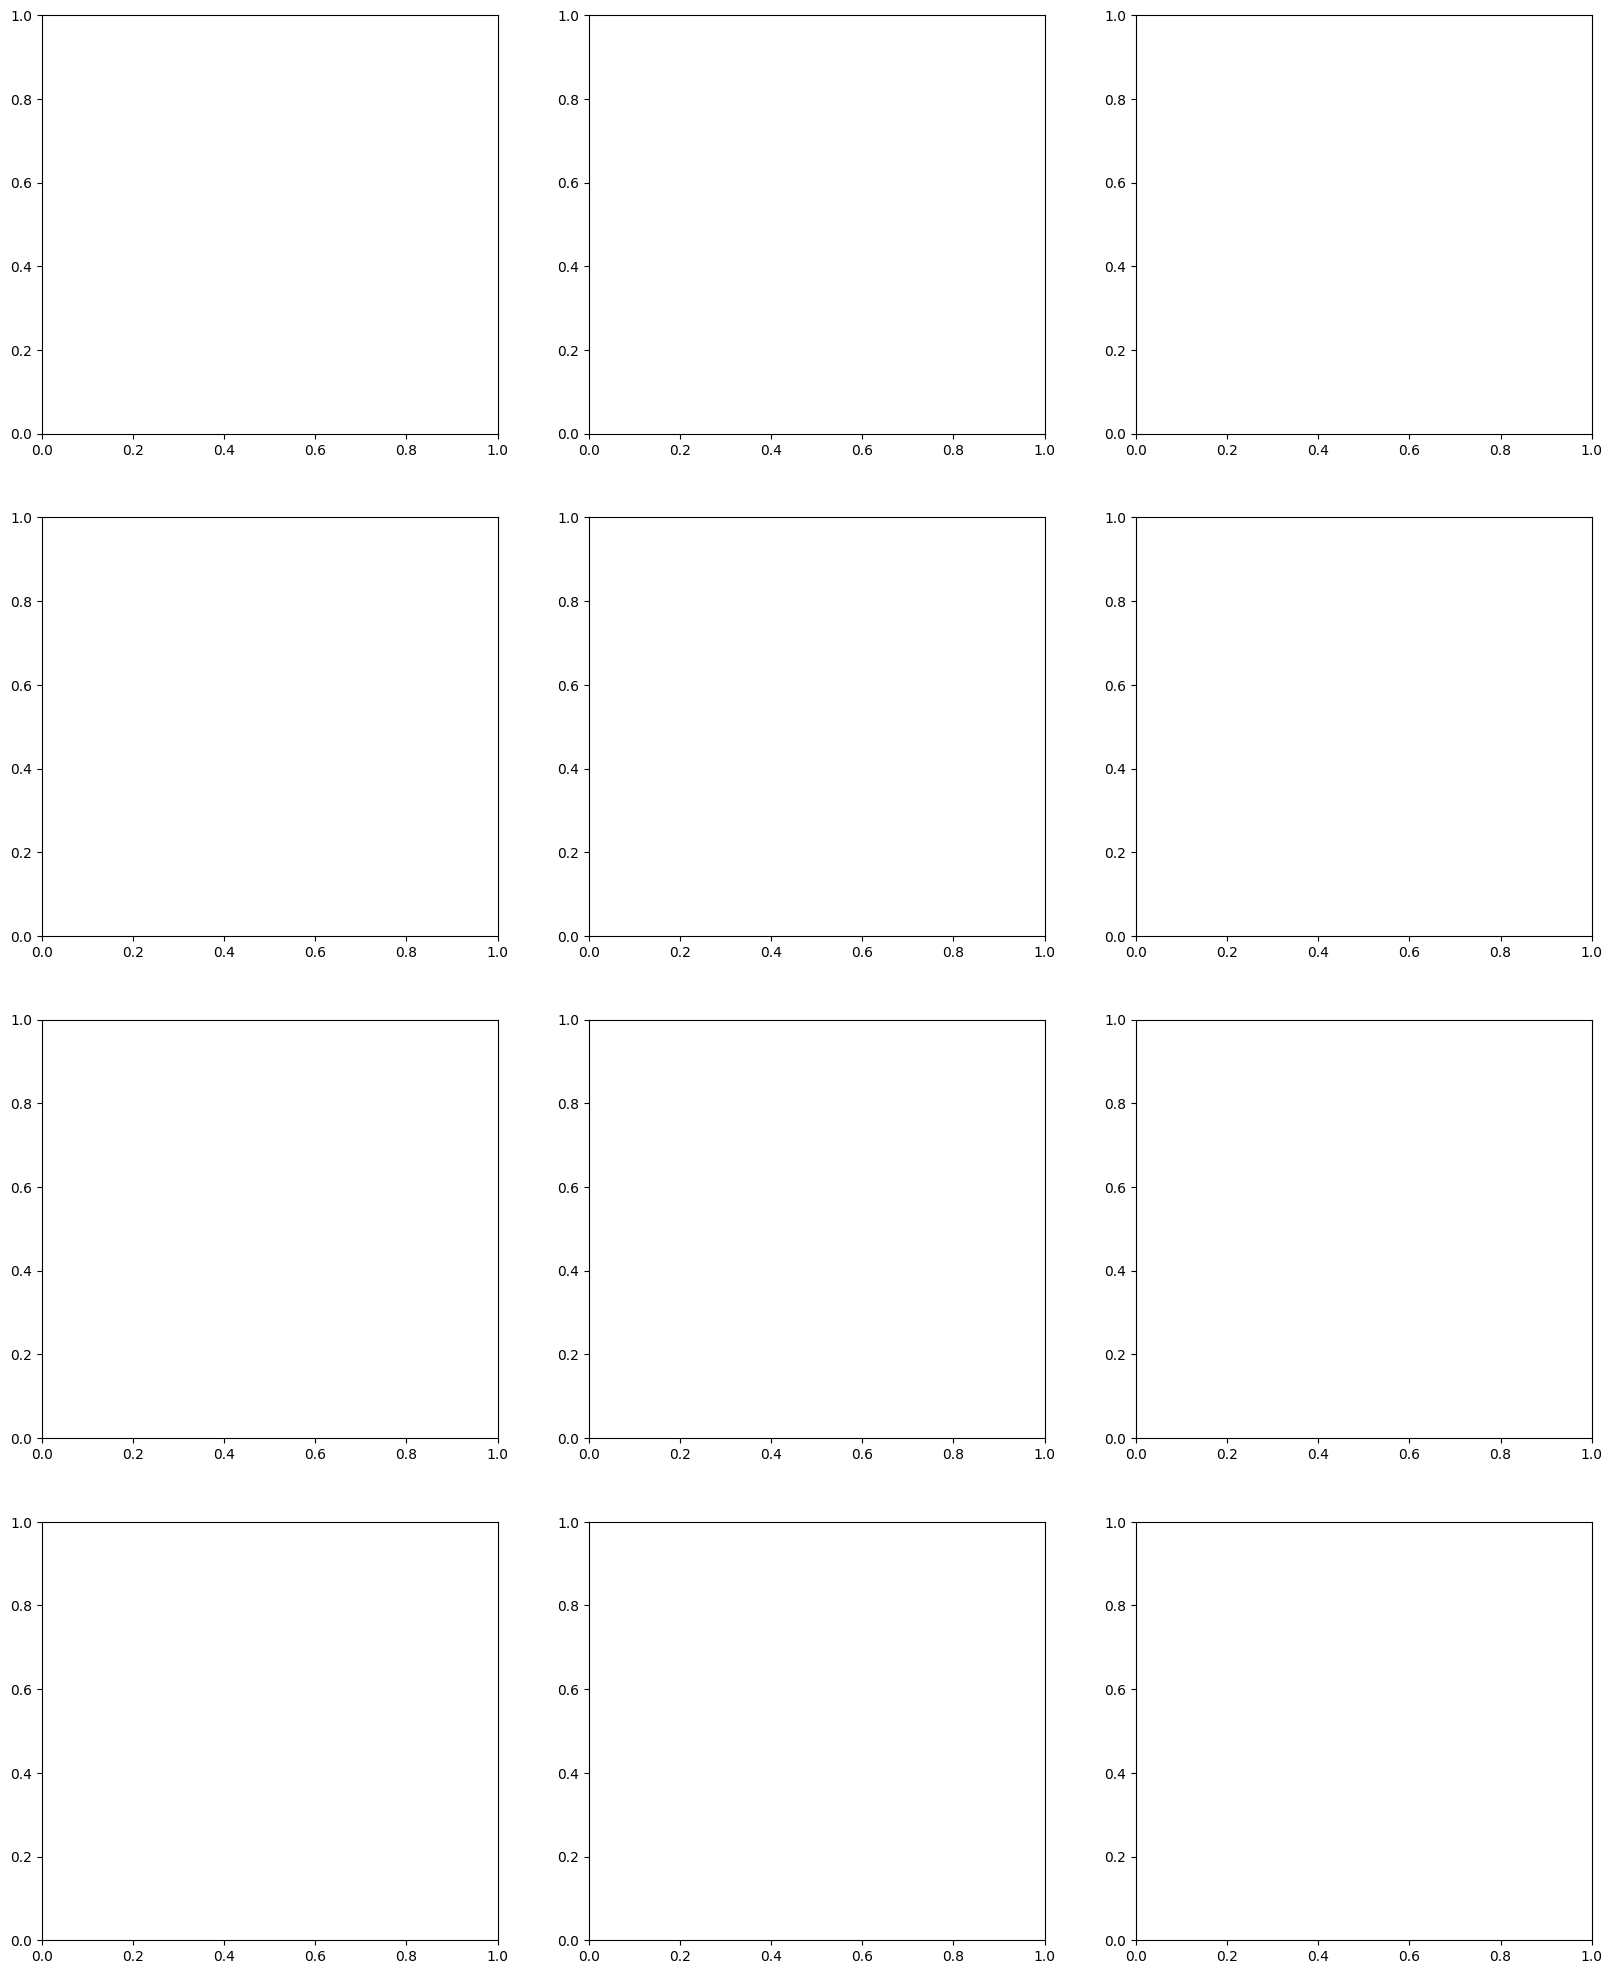

In [ ]:
plt.subplots(nrows=4,ncols=3,figsize=(20,25))
axes = axes.flatten()
 
for i, column in enumerate(df2.columns):
    sns.histplot(df[column], kde=True, log_scale=False, label=column, element="step", fill=True, ax=axes[i])
    axes[i].legend()
    axes[i].set_title(f'Distribución de la columna {column}')
    axes[i].set_xlabel('Valor')
    axes[i].set_ylabel('Frecuencia')
 
plt.tight_layout()
plt.show()
for column in df2.columns:
    sns.histplot(df2[column], kde=True, log_scale=False, label=column, element="step", fill=False)
plt.legend()
plt.title('Distribuciones de las columnas numéricas')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:

#ppto=df2.groupby(['Product_Category','Channel']).agg({'Budget':'mean'}).round()
#spend=df2.groupby(['Product_Category','Channel']).agg({'Spend':'mean'}).round()
#revenue=df.groupby(['Product_Category','Channel']).agg({'Spend':'mean'}).round()
#ppto

In [ ]:
#df.dropna(subset=['Channel'],inplace=True)
#df.dropna(subset=['Region'],inplace=True)
#df

## EDA

1. agrupar ppto en tramos 
2. agrupar gasto en tramos 
3. agrupar por rango de dias
4. por ppto las veces que se vio 
5. por ppto las veces que se clico 
6. por ppto la tasa de click 
7. por gasto las veces que se vio 
8. por gasto las veces que se clico 
9. por gasto la tasa de click 
10.por segmento de mercado, el gasto medio 
11. por segmento de mercado, el ppto medio 
12. por segmento de mercado, los ingresos medios 
** seria bueno hacer una correlacion entre ppto y gasto, y gasto e ingresos 
13. canal de marketing donde mas ingresos se obtuvieron 
14.categoria del prodcuto donde mas ingreso se obtuvieron
15. region donde mas ingreso se obtuvieron 
16. por duracion de días de campaña, donde se obtuvieron mas ingresos
canal y categoria donde mas ingreso se obtuvieron 
region canal y categoria donde mas ingreso se obtuvieron 
y luego toda la campaña 

CORRELACION VALORES NUMERICOS (FILTRO POR COLUMNAS NUMERICAS Y MUESTRO LA CORRELACION) HEATMAP

In [ ]:
column_types = df.dtypes
l_col_num = []
for i in range(len(df.columns)):
    if column_types[i] == 'int64' or column_types[i] == 'float64':
        l_col_num.append(df.columns[i])
print(l_col_num)
l_col_cat = []
for i in range(len(df.columns)):
    if column_types[i] == 'object':
        l_col_cat.append(df.columns[i])
l_col_cat.remove('Start_Date')  #eliminamos las fechas de esta lista
l_col_cat.remove('End_Date')
print(l_col_cat)
#l_col_num columnas numericas
#l_col_cat columnas categoricas
df_fact = df[l_col_cat + l_col_num]
df_fact[l_col_cat] = df_fact[l_col_cat].apply(lambda x: pd.factorize(x)[0])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4728\3361124321.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if column_types[i] == 'int64' or column_types[i] == 'float64':
C:\Users\Usuario\AppData\Local\Temp\ipykernel_4728\3361124321.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if column_types[i] == 'object':


['Budget', 'Spend', 'Impressions', 'Clicks', 'CTR', 'Conversions', 'CR', 'Revenue', 'ROI', 'Duration', 'Customer_Satisfaction', 'Campaign_Effectiveness']


ValueError: list.remove(x): x not in list

<Axes: xlabel='Budget', ylabel='Count'>

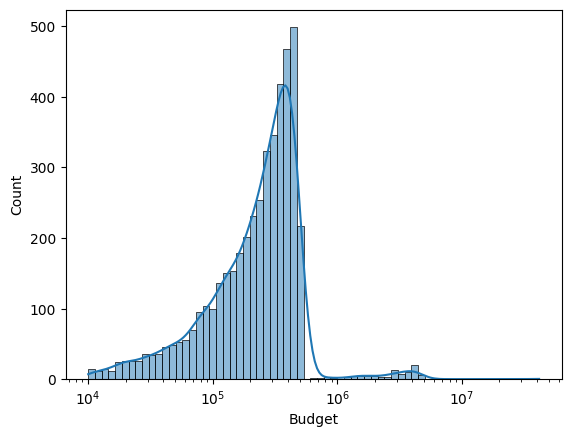

In [ ]:
sns.histplot(df['Budget'], kde=True, log_scale=True)

NameError: name 'l_col_num' is not defined

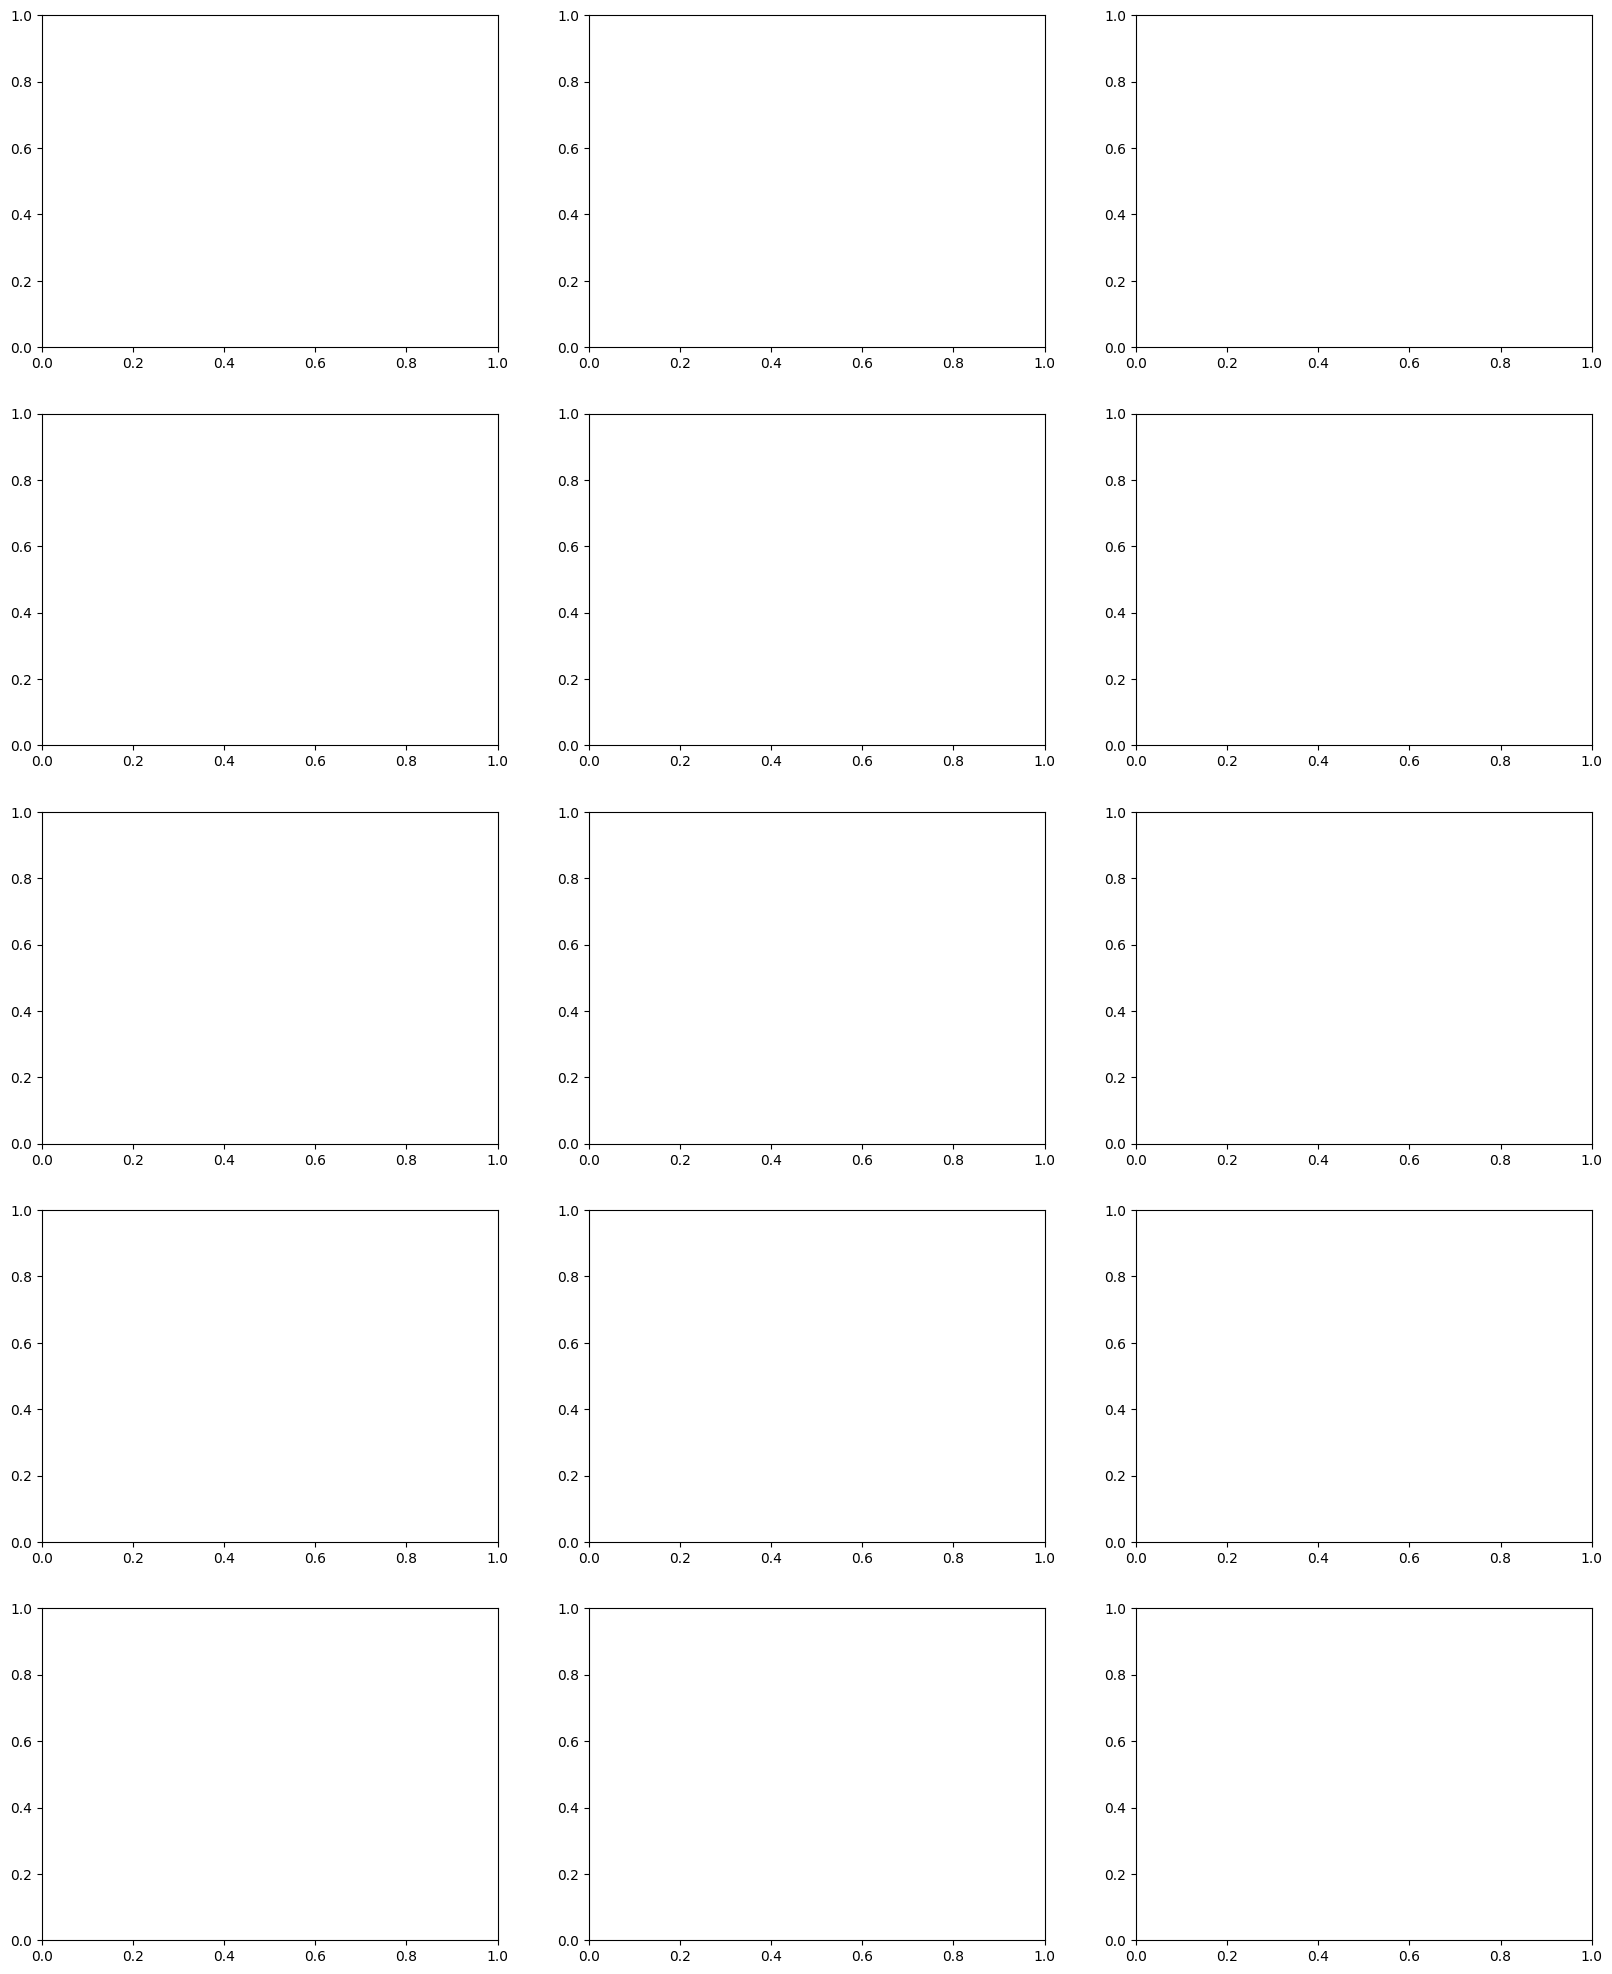

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 25))
axes = axes.flatten()
 
for i, column in enumerate(l_col_num):
    sns.histplot(df[column], kde=True, log_scale=False, label=column, element="step", fill=True, ax=axes[i])
    axes[i].legend()
    axes[i].set_title(f'Distribución de la columna {column}')
    axes[i].set_xlabel('Valor')
    axes[i].set_ylabel('Frecuencia')
 
plt.tight_layout()
plt.show()
for column in l_col_num:
    sns.histplot(df[column], kde=True, log_scale=False, label=column, element="step", fill=False)
plt.legend()
plt.title('Distribuciones de las columnas numéricas')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

IndexError: index 36 is out of bounds for axis 0 with size 36

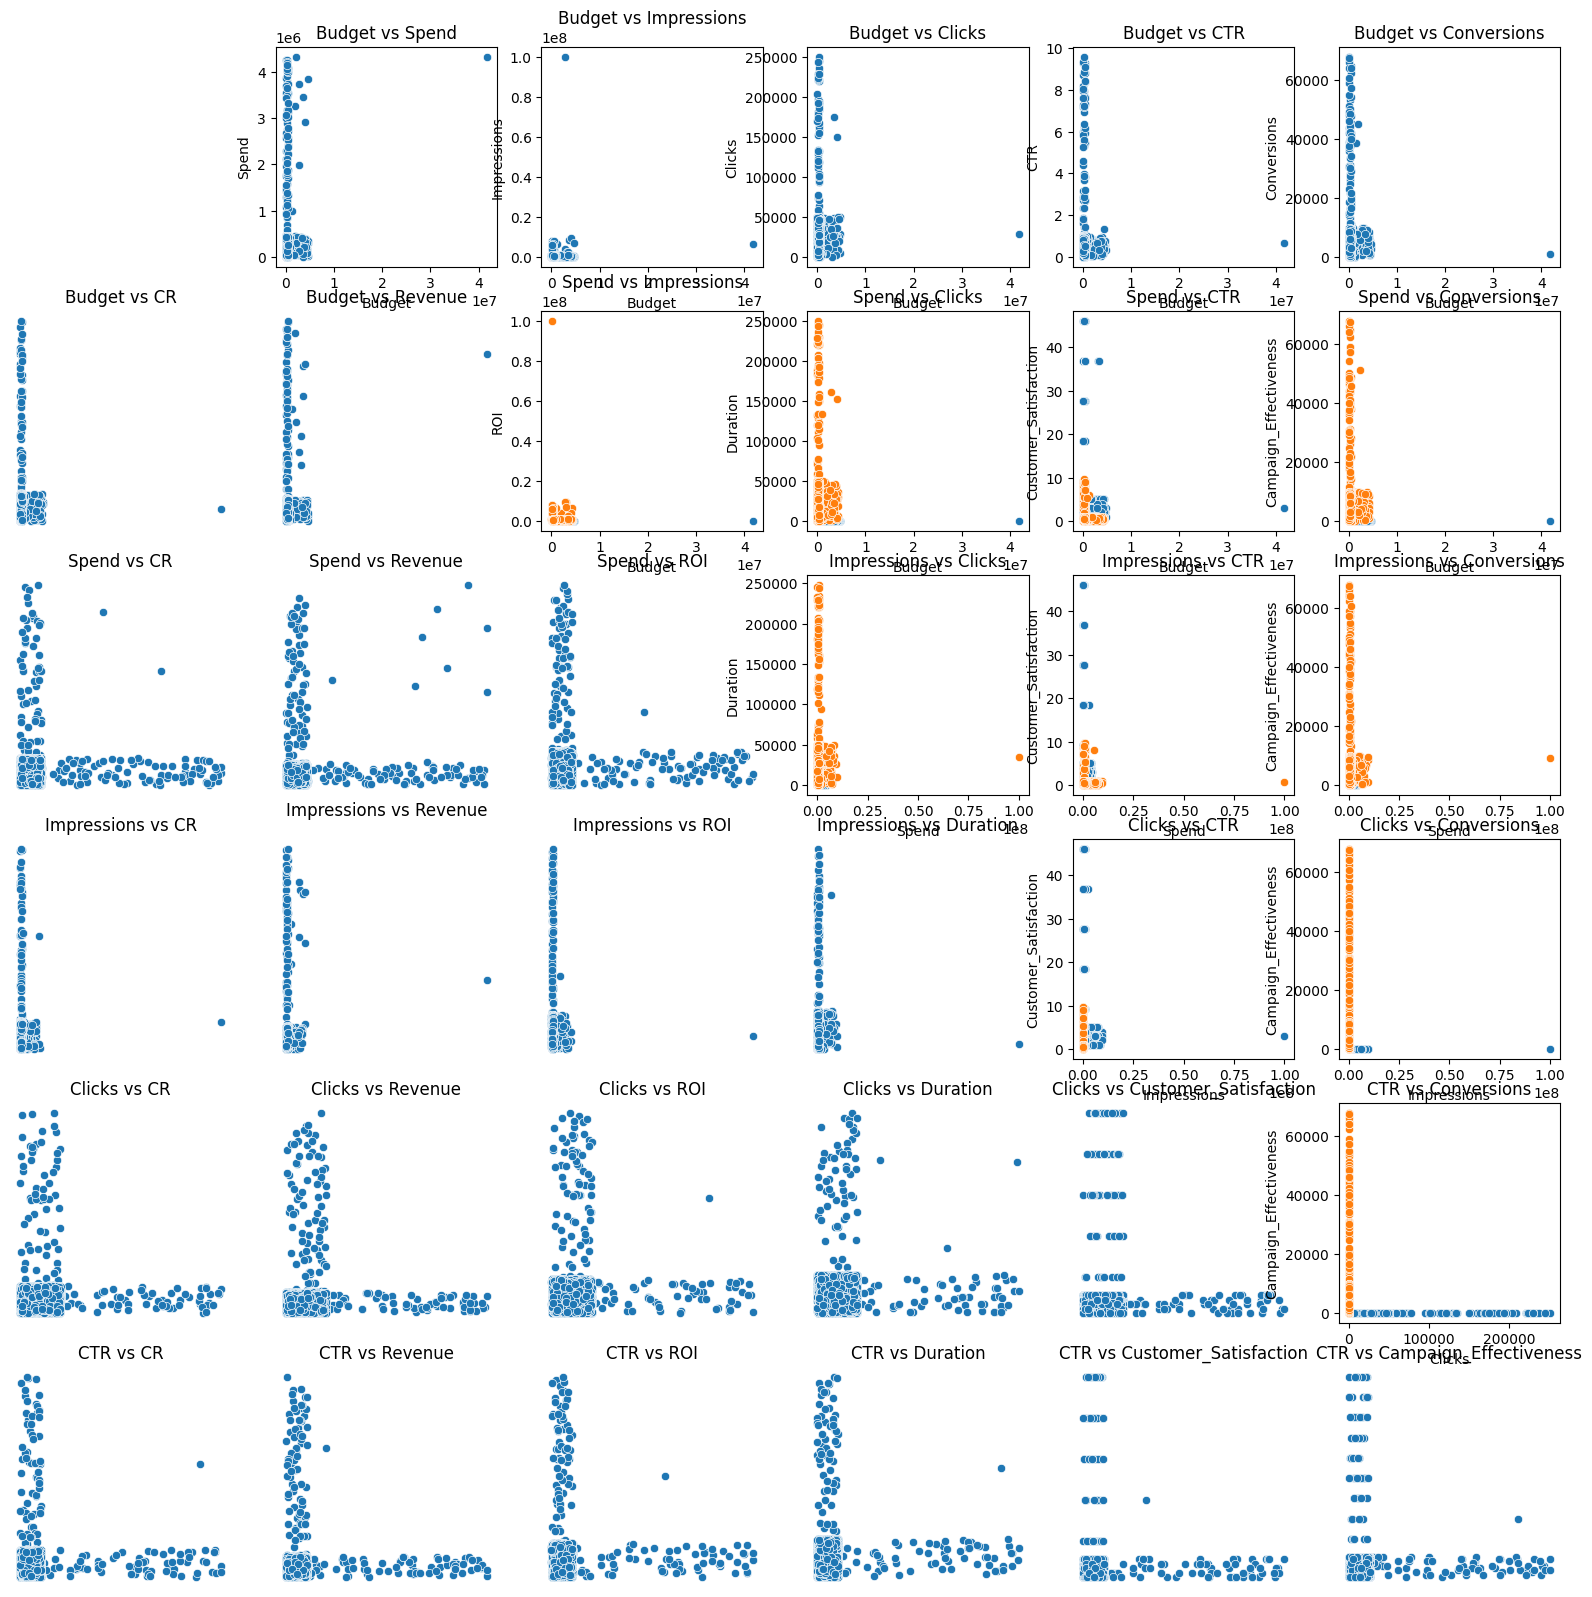

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(20, 20))
axes = axes.flatten()
 
for i, col1 in enumerate(l_col_num):
    for j, col2 in enumerate(l_col_num):
        if i < j:
            sns.scatterplot(data=df, x=col1, y=col2, ax=axes[i*6 + j])
            axes[i*6 + j].set_title(f'{col1} vs {col2}')
        else:
            axes[i*6 + j].axis('off')
 
plt.tight_layout()
plt.show()